In [1]:
from apps.twodimensional.shallowwatermomentequations import shallow_water_moment_equations as swme
from apps.twodimensional.shallowwaterlinearizedmomentequations import shallow_water_linearized_moment_equations as swlme
from apps.twodimensional.shallowwaterlinearizedmomentequations.manufacturedsolutionexample import manufactured_solution_example as swlme_mse
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.timestepping import explicit_runge_kutta
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.utils import xt_functions
from pydogpack.visualize import plot

import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

from IPython.display import HTML

# Manufactured Solution

In [32]:
num_moments = 0
num_eqns = 2 * num_moments + 3

gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

list_ = [xt_functions.AdvectingSine2D(0.1, 1.0, 1.0, 0.0, 1.0)]
for i_eqn in range(1, num_eqns):
    list_.append(xt_functions.AdvectingSine2D(0.1, 1.0, 0.0, 0.1 * i_eqn, 1.0))

exact_solution = xt_functions.ComposedVector(list_)

max_p = np.array([1.1, 0.1, 0.1] + [0.1 for i in range(2 * num_moments)])
max_q = swme.get_conserved_variables(max_p)
max_wavespeed = 1.0

problem = swlme_mse.ManufacturedSolutionExample(
    exact_solution, 
    max_wavespeed, 
    num_moments, 
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

n = np.array([1.0, 1.0])
t = 0.0
x = np.array([0.0, 0.0])
eigenvalues = problem.app_.quasilinear_eigenvalues(max_q, x, t, n)
max_wavespeed = np.max(np.abs(eigenvalues))
problem.max_wavespeed = max_wavespeed

time_final = 0.03
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 2
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = False
problem.parameters["time_stepping"]["num_frames"] = 10
problem.parameters["time_stepping"]["order"] = space_time_order

num_rows = 10
num_cols = 10
x_left = 0.0
x_right = 1.0
y_bottom = 0.0
y_top = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_cartesian"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top
problem.parameters["mesh"]["num_rows"] = num_rows
problem.parameters["mesh"]["num_cols"] = num_cols

problem.parameters["basis"]["basis_class"] = "legendre_2d_cartesian"
problem.parameters["basis"]["inner_product_constant"] = 0.25
problem.parameters["basis"]["space_order"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.1
delta_x = (x_right - x_left) / num_cols
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, delta_x))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [33]:
final_solution = main.run(problem)

In [34]:
final_solution.coeffs

array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],


ValueError: z array must not contain non-finite values within the triangulation

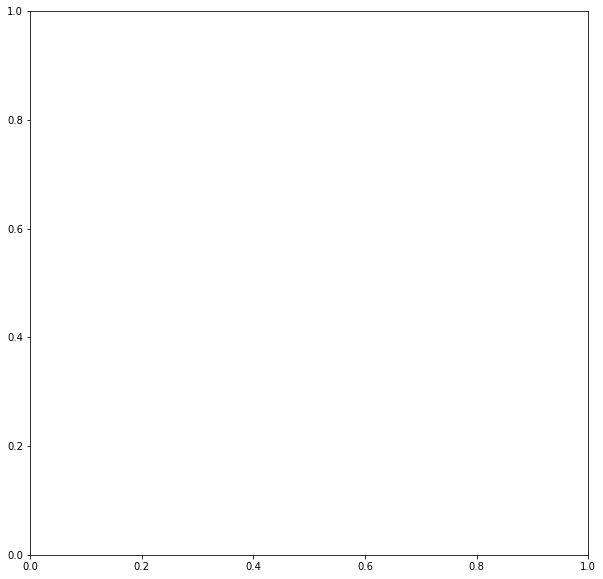

In [29]:
p = final_solution.create_plot(0)

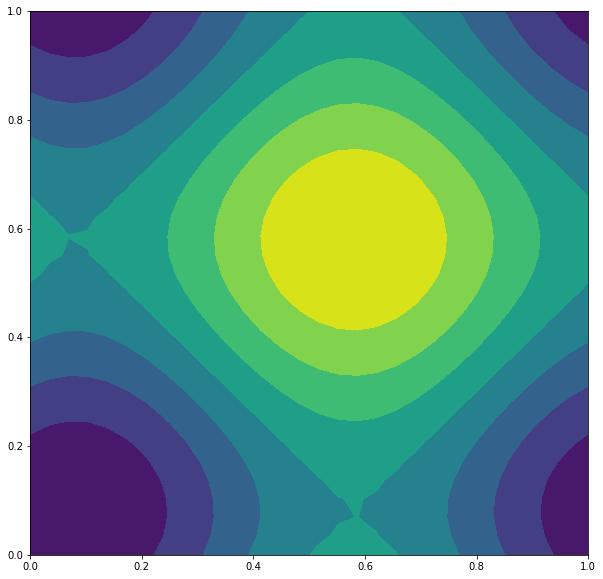

In [17]:
exact_final_height = x_functions.FrozenT(list_[0], time_final)
p = plot.create_plot_function_2d_contour(exact_final_height, 0.0, 1.0, 0.0, 1.0)

In [22]:
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)
error = math_utils.compute_error(final_solution, exact_final_solution)
error

0.08904558184439333